# Is it a fair coin?

... is a non trivial questions to which an answers can be given through Bayesian reasoning, updated on the basis of observed data. Investigating the illustrative random experiment of tossing a coin, we will unfold the beauty of probabilistic reasoning and how a Bayesian approaches such.

### What kind of coin are we talking about? - Models

"Flipping a coin" (or equivalently "rolling a two-sided die") is common term for conducting random experiment with two discrete outcomes: _head_ or _tail_, which we, with no loss of generality, can map to 1 and 0.

In [2]:
head = 1; tail = 0

Thinking of such a coin (or two-sided die), we already can distinguish between the two fundamental assumption of having a _fair_ coin (or _ideal_ die), in contrast to dialing with a biased one. Let the model $\cal{M}_\mathrm{0}$ describe a fair coin without bias, which serves us as [null hypethesis](https://en.wikipedia.org/wiki/Null_hypothesis). The opposing model $\cal{M}'$ supports the hypothesis of a coin with a certain, but yet arbitrary, bias.

### Where is the bias? - Parameterisation

For a fair coin, we would assume the probabilities of tossing head or tail to be equal,

$$
    P(\mathrm{head}) = P(\mathrm{tail}) = 1 - P(\mathrm{head}) = \tfrac{1}{2}
    .
$$

For a biased coin, however, there is a certain unbalance that we can parameterise by $\alpha$, such that

$$
    P(\mathrm{head} \,|\, \alpha) = \alpha
    \hspace{5em}
    P(\mathrm{tail} \,|\, \alpha) = ( 1 - \alpha )
    ,
$$

with $\alpha \in [0,1]$, where $\alpha = \tfrac{1}{2}$ is the special case of zero bias.
<br>
Here [conditional probabilities](https://en.wikipedia.org/wiki/Conditional_probability) $P(\cdot \,|\, \alpha)$ are introduced, which describe the probability of a proposition given a certain value of $\alpha$.

**_Remark:_** The value of $\alpha$ is "given", because the coin at hand is given. This subtly implies the assumption that the bias of the coin is fixed and not altered during the experiment.

### What are the chances? - Priors

Before - "prior to" - tossing for the first time, we should formalise our expectations regarding the bias parameter $\alpha$ as a [prior probability](https://en.wikipedia.org/wiki/Prior_probability).

The fair coin clearly has an $\alpha$ of $\tfrac{1}{2}$. Therefore, the prior $P_\mathrm{0}$ can writen as [Dirac delta](https://en.wikipedia.org/wiki/Dirac_delta_function),

$$
    P_\mathrm{0}( \alpha \,|\, \cal{M}_\mathrm{0} ) = \delta\left( \alpha - \tfrac{1}{2} \right)
    .
$$

For completeness and clarity, the underlying assumption of model $\cal{M}_\mathrm{0}$ as explicitly been added.

When we consider a biased coin on the other hand, there are many plausible priors we could assume. These can be devided into two general classes: _objective_ and _informative_ priors of which we pick one representetive each.

The objective prior $P_\mathrm{1}$ deserves that name as it is indifferent to the bias; i.e., all possible values of $\alpha$ are equally likely, and thus, the prior is constant,

$$
    P_\mathrm{1}( \alpha \,|\, \cal{M}' ) = 1
    .
$$

**_Remark:_** Constant priors are flat on a linear scale and not necessarily objective. If the random variable scales non-linearly (e.g., if it is only known to be a strictly positive real number), a constant prior is not objective.

Informative priors incorporate any kind of foreknowledge and can thus be of arbitrary complexity.
<br>
For example, imagine the coin tossing would be linked to a bet. To keep the game interesting, the coin should appear to be fair; i.e., values of $\alpha$ around $\tfrac{1}{2}$, which represent a small bias, should be more probable then values implying a large bias. Furthermore, real world gambling never favours the bettor; i.e., we could anticipate a bias in favour of either heads or tails, not both. The prior $P_\mathrm{2}$ is an example that roughly summarizes these thoughts,

$$
    P_\mathrm{2}( \alpha \,|\, \cal{M}' ) = \begin{cases} 24\alpha^2 & 0 \leq \alpha \leq \tfrac{1}{2} \\ 0 & \mathrm{else} \end{cases}
    .
$$

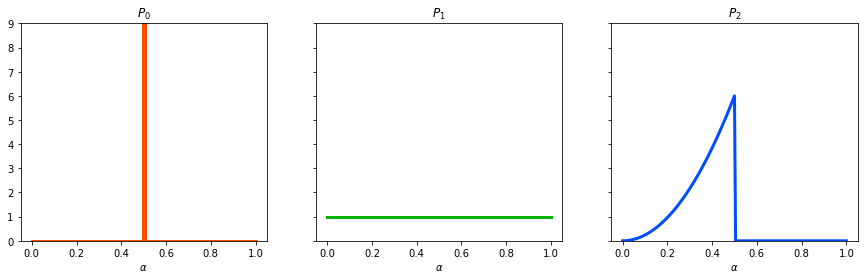

In [21]:
%matplotlib inline

import numpy as np
import pylab as pl
from IPython import display
from time import sleep

def plot_base():
    "provide basic subplot 1x3 and plot P0"
    fig, (ax0, ax1, ax2) = pl.subplots(1, 3, sharey=True) ; fig.set_figwidth(fig.get_figwidth() * 2.5)
    pl.ylim((0, 9))
    ax0.plot(a, p0, linewidth=3, color=(1.0 , 0.3, 0.0)) ; ax0.set_title("$P_\mathrm{0}$"); ax0.set_xlabel("$\\alpha$")
    ax1.set_title("$P_\mathrm{1}$") ; ax1.set_xlabel("$\\alpha$")
    ax2.set_title("$P_\mathrm{2}$") ; ax2.set_xlabel("$\\alpha$")
    return ax0, ax1, ax2

def _clear_lines_of(ax):
    "remove lines from given axes"
    for line in ax.lines:
        #line.set_linewidth(1)
        #line.set_alpha(line.get_alpha() * 0.5)
        line.remove()

def plot():
    "clear axes and plot P1 and P2"
    _clear_lines_of(ax1)
    _clear_lines_of(ax2)
    ax1.plot(a, p1, linewidth=3, color=(0.0 , 0.7, 0.0), alpha=1)
    ax2.plot(a, p2, linewidth=3, color=(0.0 , 0.3, 1.0), alpha=1)
    display.display(pl.gcf())
    display.clear_output(wait=True)

a = np.linspace(0, 1, 201)
p0 = np.array([np.iinfo(np.int32).max if (alpha == 0.5) else 0 for alpha in a])    
ax0, ax1, ax2 = plot_base()
p1 = np.array([1 for alpha in a])
p2 = np.array([24 * alpha**2 if (0 <= alpha <= 0.5) else 0 for alpha in a])
plot()

**_Comment:_** The above figure shows (in orange) the prior $P_\mathrm{0}$, which excludes all $\alpha \neq \tfrac{1}{2}$, (in green) the objective prior $P_\mathrm{1}$, which is constant, and (in blue) the informative prior $P_\mathrm{2}$ for further comparison.

### How likely is that? - Likelihood

With the above parameterisation, we have already settled the likelihood of a single event,

$$
    P(\mathrm{head} \,|\, \alpha) = \alpha
    \hspace{5em}
    P(\mathrm{tail} \,|\, \alpha) = ( 1 - \alpha )
$$

Say, we toss $N$-times and observe a certain number of heads, $n_\mathrm{head} = n$, and tails, $n_\mathrm{tail} = N - n$. In favour of a concise notation, we summarize all abservations in an $N$-dimensional data vector $\boldsymbol{d}$,

$$
    \boldsymbol{d} = \left( 0, 0, 1, 0, 1, 0, 1, 0, \dots \right)
    \equiv \left( n_\mathrm{tail}, n_\mathrm{head} \right)
    = \left( N - n , n \right)
    .
$$

The likelihood of observing the data $\boldsymbol{d}$ given a certain value of $\alpha$ is described by the [binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution),

$$
    P( \boldsymbol{d} \,|\, \alpha)
    = \binom{N}{n} \alpha^n ( 1 - \alpha )^{(N - n)}
    .
$$

### What are the chances now? - Posterior

Before tossing, we only have our prior knowledge. When we noe toss the coin, we can update our knowledge state with the insights from the observed data. This updating from an _a priori_ to an _a posteriori_ knowledge state, is described by [Bayes' theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem),

$$
    P( \alpha \,|\, \boldsymbol{d}, \mathcal{M} )
    %% = \frac{P( \alpha, \boldsymbol{d} \,|\, \mathcal{M} )}{P( \boldsymbol{d} \,|\, \mathcal{M} )}
    = \frac{P( \boldsymbol{d} \,|\, \alpha, \mathcal{M} ) \, P( \alpha, \mathcal{M} )}{P( \boldsymbol{d} \,|\, \mathcal{M} )}
    .
$$

Here, the [posterior probability](https://en.wikipedia.org/wiki/Posterior_probability) $P( \alpha \,|\, \boldsymbol{d}, \mathcal{M} )$ is calculated from the likelihood $P( \boldsymbol{d} \,|\, \alpha, \mathcal{M} )$ and the prior $P( \alpha, \mathcal{M} )$. Please note, that our prior knowledge of $\alpha$ is updated to $\alpha$ "given" $\boldsymbol{d}$, as we have collected data.
<br>
The denominator term $P( \boldsymbol{d} \,|\, \mathcal{M} )$ denotes the evidence that, for now, merely serve as normalisation.

**_Remark:_** This reasoning is consistent; i.e., it does not matter whether we update our knowledge with every new data point or with the whole data set at once.

Model $\mathcal{M}_\mathrm{0}$ consinders a fair coin and only a fair coin. It is not surprising, that this knowledge state remains unchanged regardless of the observed data,

$$
    P_\mathrm{0}( \alpha \,|\, \boldsymbol{d}, \mathcal{M}_\mathrm{0} )
    = P_\mathrm{0}( \alpha \,|\, \cal{M}_\mathrm{0} )
    = \delta\left( \alpha - \tfrac{1}{2} \right)
    .
$$

The update of the objective prior, being constant, yields exactly the binomial likelihood,

$$
    P_\mathrm{1}( \alpha \,|\, \boldsymbol{d}, \mathcal{M}' ) 
    = P( \boldsymbol{d} \,|\, \alpha)
    = \binom{N}{n} \alpha^n ( 1 - \alpha )^{(N - n)}
    .
$$

Updating the informative prior results in

$$
    P_\mathrm{2}( \alpha \,|\, \boldsymbol{d}, \mathcal{M}' )
    \propto \begin{cases} \mathcal{B}(n + 3, N - n + 1, \tfrac{1}{2}) \, \alpha^{(n + 2)} ( 1 - \alpha )^{(N - n)} & 0 \leq \alpha \leq \tfrac{1}{2} \\ 0 & \mathrm{else} \end{cases}
    ,
$$

which is a complex expression involving the [incomplete beta function](https://en.wikipedia.org/wiki/Beta_function#Incomplete_beta_function),

$$
    \mathcal{B}(a, b, x) = \int_0^x \mathrm{d}t \, t^{(a - 1)} (1 - t)^{(b - 1)}
    \hspace{5em}
    \mathcal{B}(a, b) = \mathcal{B}(a, b, 1)
    .
$$

The code below illustrates the sequential updates of these probabilities with each coin toss. Let us take a close look ...

N = 30   n = 7   heads-to-tails frequency : 0.233


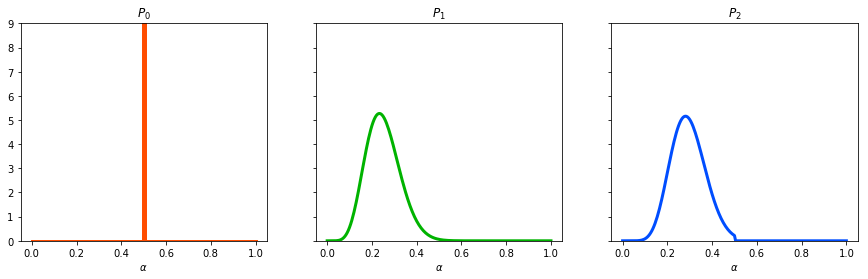

In [22]:
%matplotlib inline

from scipy.special import beta, betainc ## (incomplete) beta function
from time import sleep

alpha_REAL = 0.3 ## true bias
Nmax = 30 ## maximum number of tosses

def beta_function(a, b, x=None):
    result = beta(a, b)
    if(x is not None):
        result *= betainc(a, b, x)
    return result

a = np.linspace(0, 1, 201)
p0 = np.array([np.iinfo(np.int32).max if (alpha == 0.5) else 0 for alpha in a])    
ax0, ax1, ax2 = plot_base()
p1 = np.array([1 for alpha in a])
p2 = np.array([24 * alpha**2 if (0 <= alpha <= 0.5) else 0 for alpha in a])
plot()
sleep(1.5)
data = [] ; N = n = 0
for ii in range(Nmax):
    sleep(0.5)
    data = np.append(data, int(np.random.random() < alpha_REAL))
    N = len(data) ## number of tosses
    n = int(data.sum()) ## numbers of heads
    p1 = np.array([alpha ** n * (1 - alpha) ** (N - n) for alpha in a]) / beta_function(n + 1, N - n + 1)
    p2 = np.array([alpha ** (n + 2) * (1 - alpha) ** (N - n) if (0 <= alpha <= 0.5) else 0 for alpha in a]) / beta_function(n + 3, N - n + 1, 0.5)
    plot()
print("N =", N, "  n =", n, "  heads-to-tails frequency :", np.round(n / N, 3))

**_Comments:_**
* $P_\mathrm{0}$ (in orange) stays unchanged, as discussed above
* $P_\mathrm{1}$ (in green) is non-zero everywhere at the start, but suddenly drops to zero at the most right (left) when the first head (tail) is tossed, because this excludes $\alpha = 0$, "only tails" ($\alpha = 1$, "only heads").
* $P_\mathrm{2}$ (in blue) is always zero in $]\tfrac{1}{2},1]$, as the prior excludes this range.
* $P_\mathrm{1}$ and $P_\mathrm{2}$ (in blue) exhibit each one peak that shrinks progressively narrowing down the range of reasonable $\alpha$, and will eventually converge to the defined $\alpha_\mathrm{REAL}$.

### What bias is to be expected? - Estimators

With the posterior, we can also compute the [moments](https://en.wikipedia.org/wiki/Moment_(mathematics) or [cumulants](https://en.wikipedia.org/wiki/Cumulant), especially to first order to retrieve the [expectation value](https://en.wikipedia.org/wiki/Expected_value) of $\alpha$,

$$
    \left< \alpha \right> = \int_0^1 \mathrm{d}\alpha \, \alpha \, P(\alpha \,|\, \boldsymbol{d}, \mathrm{M})
    .
$$

In an analogous manner, we can compute the variance,

$$
    \big< \big( \alpha - \big< \alpha \big> \big)^2 \big> = \big< \alpha^2 \big> - \big< \alpha \big>^2
    ,
$$

which describes the spread around the expectation value, and thus, can be interpreted as a measure for uncertainty. Its square root is the [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) $\sigma$.

The code below shows the expectation values for our different posteriors for a simulated sequence of coin tosses, and the $3 \sigma$ interval around the objective estimator $\left< \alpha_\mathrm{1} \right>$.

alpha_REAL = 0.3   frequency = 0.31   <alpha0> = 0.5   <alpha1> = 0.314   <alpha2> = 0.327


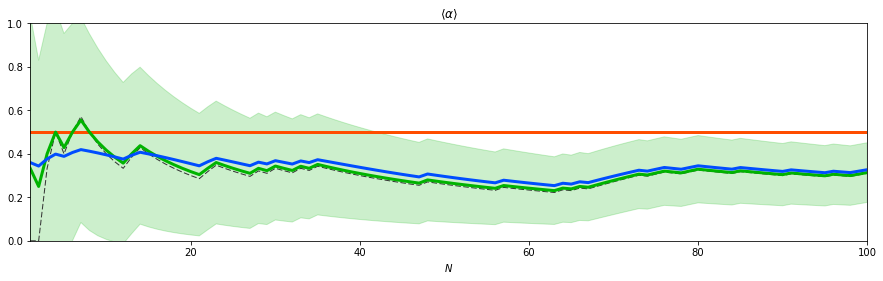

In [24]:
%matplotlib inline

alpha_REAL = 0.3 ## true bias
Nmax = 100 ## maximum number of tosses

data = (np.random.random(Nmax) < alpha_REAL).astype(np.int)
N = np.arange(1, Nmax + 1)
n = np.cumsum(data)
freq = n / N
a0 = 0.5
a1 = (lambda M, m: beta_function(m + 2, M - m + 1) / beta_function(m + 1, M - m + 1))(N, n)
s1 = np.sqrt((lambda M, m: beta_function(m + 3, M - m + 1) / beta_function(m + 1, M - m + 1))(N, n) - a1 ** 2)
a2 = (lambda M, m: beta_function(m + 4, M - m + 1, 0.5) / beta_function(m + 3, M - m + 1, 0.5))(N, n)
fig, ax = pl.subplots() ; fig.set_figwidth(fig.get_figwidth() * 2.5)
pl.xlim((1, Nmax)) ; pl.ylim((0, 1)) ; ax.set_title("$\\left<\\alpha\\right>$") ; ax.set_xlabel("$N$")
ax.plot(N, freq, linestyle="--", linewidth=1, color=(0.2, 0.2, 0.2), zorder=-1)
ax.hlines(a0, xmin=0, xmax=Nmax, linewidth=3, color=(1.0 , 0.3, 0.0), zorder=0)
ax.plot(N, a1, linewidth=3, color=(0.0, 0.7, 0.0), zorder=1)
ax.fill_between(N, a1 - 3 * s1, a1 + 3 * s1, color=(0.0, 0.7, 0.0, 0.2), zorder=-1)
ax.plot(N, a2, linewidth=3, color=(0.0, 0.3, 1.0), zorder=2)
print("alpha_REAL =", alpha_REAL, "  frequency =", np.round(freq[-1], 3), "  <alpha0> =", a0 , "  <alpha1> =", np.round(a1[-1], 3), "  <alpha2> =", np.round(a2[-1], 3))

**_Comments:_** The above figure shows the expectation values of $P_\mathrm{0}$ (in orange), $P_\mathrm{1}$ (in green), and $P_\mathrm{2}$ (in blue), as well as the $3\sigma$ interval around $\left< \alpha_\mathrm{1} \right>$ (in light green) and the heads-to-tails frequency (in dashed gray) for comparison.
<br>
This figure confirms our previous observations of convergence against $\alpha_\mathrm{REAL}$. The zigzag-features, which are most prominent for small $N$, come from switch between head and tail steaks.

### Is it a fair coin, or is it biased? - Evidence

The term $P(\boldsymbol{d} \,|\, \mathcal{M})$, which we earlier dismissed as mere normalisation, describes how likely it is to obtain the data $\boldsymbol{d}$ under the assumption of model $\mathcal{M}$. In the Bayesian formalism, it is denoted as evidence or [marginal likelihood](https://en.wikipedia.org/wiki/Marginal_likelihood) of the model. Marginalisation means the integration over the whole parameter phase space, such that

$$
    P(\boldsymbol{d} \,|\, \mathcal{M})
    = \int_0^1 \mathrm{d}\alpha \, P(\alpha, \boldsymbol{d} \,|\, \mathcal{M})
    = \int_0^1 \mathrm{d}\alpha \, P(\boldsymbol{d} \,|\, \alpha, \mathcal{M}) \, P(\alpha \,|\, \mathcal{M})
    .
$$

The evidence of model $\mathcal{M}_\mathrm{0}$ that supports a fair coin is

$$
    P_\mathrm{0}(\boldsymbol{d} \,|\, \mathcal{M}_0)
    = \int_0^1 \mathrm{d}\alpha \, \binom{N}{n} \alpha^n ( 1 - \alpha )^{(N - n)} \, \delta\left( \alpha - \tfrac{1}{2} \right) 
    = \binom{N}{n} \left(\frac{1}{2}\right)^N
    .
$$

The evidence of model $\mathcal{M}'$ derived from the objective prior computes to

$$
    P_\mathrm{1}(\boldsymbol{d} \,|\, \mathcal{M}')
    = \int_0^1 \mathrm{d}\alpha \, \binom{N}{n} \alpha^n ( 1 - \alpha )^{(N - n)} 
    = \binom{N}{n} \mathcal{B}(n + 1, N - n + 1)
    = \frac{1}{N + 1}
$$

and the one derived from the informative prior yields

$$
    P_\mathrm{2}(\boldsymbol{d} \,|\, \mathcal{M}')
    = \int_0^{\tfrac{1}{2}} \mathrm{d}\alpha \, \binom{N}{n} \alpha^n ( 1 - \alpha )^{(N - n)} \, 24 \alpha^2
    = 24 \binom{N}{n} \mathcal{B}(n + 3, N - n + 1, \tfrac{1}{2})
    .
$$

We can interpret these evidence as measures for how plausible it is to obtain certain data under a certain model. In other words, the evidence indicates how strongly a model is supported by the data. Comparing the evidences, we can therefore judge which model is more compelling. Formally, we compute the [Bayes factor](https://en.wikipedia.org/wiki/Bayes_factor),

$$
    B = \frac{P(\boldsymbol{d} \,|\, \mathcal{M}')}{P(\boldsymbol{d} \,|\, \mathcal{M}_0)}
    ,
$$

for our model selection problem of a fair or biased coin.
<br>
Since our prior choice influences the Bayes factos, we have to consider both options,

$$
    B_1 = \frac{P_1(\boldsymbol{d} \,|\, \mathcal{M}')}{P_0(\boldsymbol{d} \,|\, \mathcal{M}_0)}
    \hspace{5em}
    B_2 = \frac{P_2(\boldsymbol{d} \,|\, \mathcal{M}')}{P_0(\boldsymbol{d} \,|\, \mathcal{M}_0)}
    .
$$

**_Remark:_** The Bayes factor scales logarithmically with $1$ being the balance point between to considered models. A ratio unequal $1$ means that the data at hand supports one model more strongly than the other. However, this preference does not proof one model is true and the other false; or in layman's terms, "better" does not mean "good".

No, this coin seems biased.


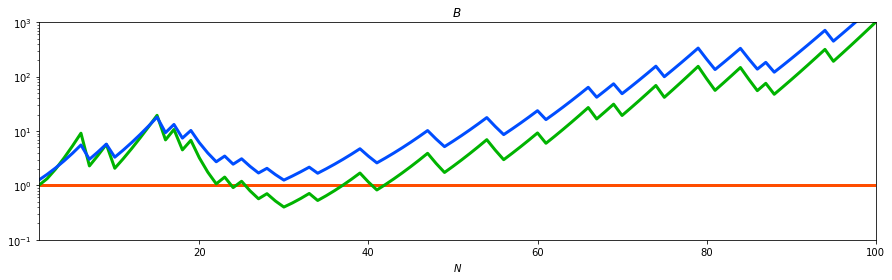

In [33]:
%matplotlib inline

from scipy.special import binom

alpha_REAL = 0.3 ## true bias
Nmax = 100 ## maximum number of tosses

data = (np.random.random(Nmax) < alpha_REAL).astype(np.int)
N = np.arange(1, Nmax + 1)
n = np.cumsum(data)
binomial = binom(N, n)
e0 = binomial * 0.5 ** N
e1 = 1 / (N + 1)
e2 =  24 * binomial * (lambda M, m: beta_function(m + 3, M - m + 1, 0.5))(N, n)
b1 = e1 / e0
b2 = e2 / e0
fig, ax = pl.subplots() ; fig.set_figwidth(fig.get_figwidth() * 2.5)
pl.xlim((1, Nmax)) ; pl.ylim((0.1, 1000)) ; ax.set_title("$B$") ; ax.set_xlabel("$N$") ; pl.minorticks_on()
ax.hlines(1, xmin=0, xmax=Nmax, linewidth=3, color=(1.0 , 0.3, 0.0), zorder=0)
ax.semilogy(N, b1, linewidth=3, color=(0.0, 0.7, 0.0), zorder=1)
ax.semilogy(N, b2, linewidth=3, color=(0.0, 0.3, 1.0), zorder=2)
if((b1[-1] > 1) or ((b2[-1] > 1))):
    print("No, this coin seems biased.")
else:
    print("Yes, this coin seems fair.")

**_Comments:_** The above figure shows the Bayes factors $B_\mathrm{1}$ (in green) and $B_\mathrm{2}$ (in blue), as well as the horizontal line at $1$ (in orange) for comparison. If the Bayes factor is above (below) this line, the biased (fair) model has stronger support by the simulated data.


### It is fair coin, is it not? - Bayes factor 

With the Bayes factor we can determine which model has stronger support by the data. Now, we generalise this result by considering a fixed amount of tosses and look at the Bayes factor as a function of data in terms of $n$, the number of tossed heads.

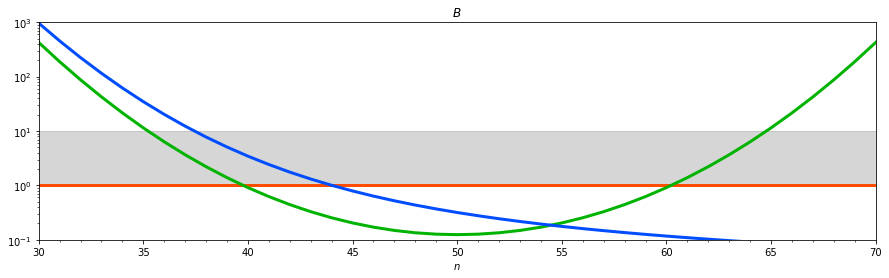

In [87]:
%matplotlib inline

from scipy.special import binom

N = 100 ## number of tosses

n = np.arange(N + 1)
binomial = binom(N, n)
e0 = binomial * 0.5 ** N
e1 = 1 / (N + 1)
e2 =  24 * binomial * (lambda M, m: beta_function(m + 3, M - m + 1, 0.5))(N, n)
b1 = e1 / e0
b2 = e2 / e0
fig, ax = pl.subplots() ; fig.set_figwidth(fig.get_figwidth() * 2.5)
x = np.round(np.argmax(b1 < 1000), -1)
pl.xlim((x, N - x)) ; pl.ylim((0.1, 1000)) ; ax.set_title("$B$") ; ax.set_xlabel("$n$") ; pl.minorticks_on()
ax.hlines(1, xmin=0, xmax=N, linewidth=3, color=(1.0 , 0.3, 0.0), zorder=0)
ax.fill_between(n, 1, 10, color=(0.2, 0.2, 0.2, 0.2), zorder=-1)
ax.semilogy(n, b1, linewidth=3, color=(0.0, 0.7, 0.0), zorder=1)
ax.semilogy(n, b2, linewidth=3, color=(0.0, 0.3, 1.0), zorder=2)
print()

**_Comments:_** The above figure shows the Bayes factors $B_\mathrm{1}$ (in green) and $B_\mathrm{2}$ (in blue), as well as the horizontal line at $1$ (in orange) for comparison. The gray area is the realm of debate whether the evidence is strong enough to already object the null hypothesis of a fair coin.
Its upperbound at $10$ is somewhat arbitrary: At a Bayes factor of $10$, the odds are $10:1$; i.e., in one out of ten trials you could produce results, which favour a biased coin, even with a fair one. As there is no strict rule to this, it is up to our [interpretation](https://en.wikipedia.org/wiki/Bayes_factor#Interpretation) and good judgement.